In [1]:
!ls

 arucoConfig				 marker_mapper1.0.15
 Aruco.ipynb				 marker_mapper1.0.15.zip
'Aruco Tryout.ipynb'			 papers
 CableDrivenRobotCableModel-master.zip	 papers.zip
 Data					 README.md
 MarkerConfigurationCamMat.zip


In [1]:
import cv2
from cv2 import aruco

import os
import sys
import numpy as np
import aruco
from matplotlib import pyplot as plt
import pkg_resources

In [7]:
dir(aruco.MarkerMapPoseTracker())

['__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__swig_destroy__',
 '__weakref__',
 'estimatePose',
 'getRTMatrix',
 'getRvec',
 'getTvec',
 'isValid',
 'reset',
 'setMaxTrackingDifference',
 'setParams',
 'this',
 'thisown']

In [10]:
# load board and camera parameters
# boardconfig_lower = aruco.BoardConfiguration("block1(lowest).yml")
# boardconfig_upper = aruco.BoardConfiguration("block1(lowest).yml")

camparam = aruco.CameraParameters()
camparam.readFromXMLFile("./arucoConfig/baumer12mm1mf.yml")

# create detector and get parameters
detector = aruco.MarkerDetector()
params = detector.getParameters()

# print detector parameters
print("detector params:")
for val in dir(params):
    if not val.startswith("__"):
        print("\t{} : {}".format(val, params.__getattribute__(val)))

# load video
cap = cv2.VideoCapture("./Data/baumer_video0043.avi")
ret, frame = cap.read()

while ret:
    markers = detector.detect(frame)

    for marker in markers:
        # print marker ID and point positions
        print("Marker: {:d}".format(marker.id))
        for i, point in enumerate(marker):
            print("\t{:d} {}".format(i, str(point)))
        marker.draw(frame, np.array([255, 255, 255]), 2)

        # calculate marker extrinsics for marker size of 3.5cm
        marker.calculateExtrinsics(0.035, camparam)
        print("Marker extrinsics:\n{}\n{}".format(marker.Tvec, marker.Rvec))
        aruco.CvDrawingUtils.draw3dAxis(frame, camparam, marker.Rvec, marker.Tvec, .1)
        print("detected ids: {}".format(", ".join(str(m.id) for m in markers)))

    # add aruco version to frame
    y, x, c = frame.shape
    text = "aruco {}".format(pkg_resources.require("aruco")[0].version)
    font = cv2.FONT_HERSHEY_PLAIN
    font_scale = 2
    thickness = 2
    cv2.putText(frame, text, (15, y - 15), font, font_scale, (255, 255, 255), thickness,
                cv2.LINE_AA)

    # show frame
    if 'DISPLAY' in os.environ.keys():
        cv2.imshow("frame", frame)
        cv2.waitKey(10)
    else:
        print("No display!")

    # read next frame
    ret, frame = cap.read()

cap.release()
cv2.destroyAllWindows()

detector params:
	acquire : <built-in method acquire of SwigPyObject object at 0x7f27f569e780>
	append : <built-in method append of SwigPyObject object at 0x7f27f569e780>
	disown : <built-in method disown of SwigPyObject object at 0x7f27f569e780>
	next : <built-in method next of SwigPyObject object at 0x7f27f569e780>
	own : <built-in method own of SwigPyObject object at 0x7f27f569e780>
Marker: 7
	0 [282.52356 380.38092]
	1 [272.20654 440.03186]
	2 [210.56512 436.2629 ]
	3 [221.30638 376.50833]
detected ids: 7, 15, 19, 21, 24
Marker: 15
	0 [336.07635 457.01453]
	1 [327. 512.]
	2 [306.4534 495.9292]
	3 [314.05695 436.1687 ]
detected ids: 7, 15, 19, 21, 24
Marker: 19
	0 [ 70.73457 530.75616]
	1 [ 95.758705 535.31165 ]
	2 [ 81.16438 593.94604]
	3 [ 56.45632 591.0177 ]
detected ids: 7, 15, 19, 21, 24
Marker: 21
	0 [1735.485    467.24542]
	1 [1717.  413.]
	2 [1735.8706  390.7542]
	3 [1754.  446.]
detected ids: 7, 15, 19, 21, 24
Marker: 24
	0 [1758.5774   327.63815]
	1 [1823.1678   312.72537]

Marker: 7
	0 [282.6042  380.74292]
	1 [272.00598 440.44897]
	2 [210.72887 436.25046]
	3 [221.71346 376.0899 ]
detected ids: 7, 19, 21, 24
Marker: 19
	0 [ 70.99779 530.4716 ]
	1 [ 95.84202 535.74176]
	2 [ 81.32757 594.20154]
	3 [ 55.888676 590.3671  ]
detected ids: 7, 19, 21, 24
Marker: 21
	0 [1735.794    466.95367]
	1 [1717.  412.]
	2 [1735.515    390.71964]
	3 [1754.  446.]
detected ids: 7, 19, 21, 24
Marker: 24
	0 [1758.354    328.01758]
	1 [1822.8407   312.28793]
	2 [1843.8204  370.721 ]
	3 [1779.1627  386.7791]
detected ids: 7, 19, 21, 24
Marker: 7
	0 [282.9168 380.9459]
	1 [272.14142 440.25296]
	2 [210.87996 436.37714]
	3 [221.4866  376.44046]
detected ids: 7, 19, 21, 24
Marker: 19
	0 [ 71.03517 530.3386 ]
	1 [ 95.88784 535.70374]
	2 [ 81.35682 594.1344 ]
	3 [ 56.16569 590.7032 ]
detected ids: 7, 19, 21, 24
Marker: 21
	0 [1735.5851   467.15628]
	1 [1717.  412.]
	2 [1735.5624   390.78662]
	3 [1754.  446.]
detected ids: 7, 19, 21, 24
Marker: 24
	0 [1758.3932  328.1235]
	1 [1822.6703

Marker: 7
	0 [282.82053 380.81042]
	1 [272.03894 440.04874]
	2 [210.68643 436.2799 ]
	3 [221.42003 376.3426 ]
detected ids: 7, 19, 21, 24
Marker: 19
	0 [ 70.90257 530.4361 ]
	1 [ 95.84933 535.58636]
	2 [ 81.34826 593.8998 ]
	3 [ 56.152103 590.7848  ]
detected ids: 7, 19, 21, 24
Marker: 21
	0 [1735.583    467.07004]
	1 [1717.  412.]
	2 [1735.5371   390.72357]
	3 [1754.  446.]
detected ids: 7, 19, 21, 24
Marker: 24
	0 [1758.4456  328.0596]
	1 [1822.6478   312.20972]
	2 [1843.866    370.72318]
	3 [1779.468    387.00067]
detected ids: 7, 19, 21, 24
Marker: 7
	0 [282.75348 380.7175 ]
	1 [272.02896 440.3561 ]
	2 [210.71237 436.24066]
	3 [221.3101 376.5313]
detected ids: 7, 19, 21, 24
Marker: 19
	0 [ 71.00352 530.3719 ]
	1 [ 95.952965 535.72675 ]
	2 [ 81.31939 594.08527]
	3 [ 56.157257 590.46985 ]
detected ids: 7, 19, 21, 24
Marker: 21
	0 [1735.638    467.18143]
	1 [1717.  412.]
	2 [1735.4698  390.7344]
	3 [1755.5748   449.70645]
detected ids: 7, 19, 21, 24
Marker: 24
	0 [1758.3861   328.2077

Marker: 7
	0 [282.8665 380.9058]
	1 [271.97614 440.59674]
	2 [210.68736 436.28473]
	3 [221.3755 376.5168]
detected ids: 7, 19, 21, 24
Marker: 19
	0 [ 71.10406 530.3814 ]
	1 [ 95.90097 535.6525 ]
	2 [ 81.27509 594.26337]
	3 [ 55.977623 590.5679  ]
detected ids: 7, 19, 21, 24
Marker: 21
	0 [1735.7284   467.22525]
	1 [1717.  412.]
	2 [1735.5354  390.6889]
	3 [1754.  446.]
detected ids: 7, 19, 21, 24
Marker: 24
	0 [1758.3523  328.1812]
	1 [1822.7502   312.27347]
	2 [1843.9779   370.92822]
	3 [1779.3735  386.8994]
detected ids: 7, 19, 21, 24
Marker: 7
	0 [282.895   380.94812]
	1 [272.17572 440.25015]
	2 [210.7068  436.22852]
	3 [221.3768 376.5645]
detected ids: 7, 19, 21, 24
Marker: 19
	0 [ 71.1331  530.32355]
	1 [ 96.0613 535.8546]
	2 [ 81.35502 594.0909 ]
	3 [ 56.27245 590.6616 ]
detected ids: 7, 19, 21, 24
Marker: 21
	0 [1735.6523   467.17007]
	1 [1717.  412.]
	2 [1735.4779   390.76566]
	3 [1754.  446.]
detected ids: 7, 19, 21, 24
Marker: 24
	0 [1758.3411   328.21878]
	1 [1822.8435  312.

Marker: 7
	0 [282.80844 380.845  ]
	1 [272.07132 440.47665]
	2 [210.68037 436.32986]
	3 [221.5015  376.42953]
detected ids: 7, 19, 24
Marker: 19
	0 [ 71.10552 530.29877]
	1 [ 95.87418 535.6745 ]
	2 [ 81.303406 594.1084  ]
	3 [ 56.062096 590.58185 ]
detected ids: 7, 19, 24
Marker: 24
	0 [1758.4117   328.44522]
	1 [1822.7626   312.37677]
	2 [1843.8251   371.02698]
	3 [1779.363   387.0157]
detected ids: 7, 19, 24
Marker: 7
	0 [282.85538 380.89352]
	1 [272.237  440.0704]
	2 [210.70215 436.2695 ]
	3 [221.51888 376.28662]
detected ids: 7, 19, 24
Marker: 19
	0 [ 70.98564 530.3234 ]
	1 [ 95.907135 535.52026 ]
	2 [ 81.41858 593.99097]
	3 [ 56.080505 590.4551  ]
detected ids: 7, 19, 24
Marker: 24
	0 [1758.4175   328.24957]
	1 [1822.8007   312.35898]
	2 [1843.8032  371.3869]
	3 [1779.2938   387.10715]
detected ids: 7, 19, 24
Marker: 7
	0 [282.6443 380.6606]
	1 [272.14822 440.17413]
	2 [210.88562 436.37433]
	3 [221.55583 376.36746]
detected ids: 7, 19, 21, 24
Marker: 19
	0 [ 71.11471 530.2728 ]
	1

Marker: 7
	0 [282.7687  380.72388]
	1 [272.09915 440.24292]
	2 [210.81595 436.36188]
	3 [221.48169 376.46075]
detected ids: 7, 15, 19, 21, 24
Marker: 15
	0 [335.99207 458.20908]
	1 [330.6637  512.29486]
	2 [305.74164 494.50766]
	3 [313.66702 436.2348 ]
detected ids: 7, 15, 19, 21, 24
Marker: 19
	0 [ 71.10966 530.3581 ]
	1 [ 95.99495 535.8034 ]
	2 [ 81.286  594.2432]
	3 [ 56.07285 590.64465]
detected ids: 7, 15, 19, 21, 24
Marker: 21
	0 [1735.7747  467.1525]
	1 [1717.  412.]
	2 [1735.4888   390.75122]
	3 [1754.  446.]
detected ids: 7, 15, 19, 21, 24
Marker: 24
	0 [1758.4459   328.24554]
	1 [1822.757    312.31375]
	2 [1843.8416   370.94006]
	3 [1779.3951  387.1473]
detected ids: 7, 15, 19, 21, 24
Marker: 7
	0 [282.82352 380.74896]
	1 [272.11353 440.24667]
	2 [210.70593 436.294  ]
	3 [221.45302 376.4461 ]
detected ids: 7, 19, 21, 24
Marker: 19
	0 [ 70.9679 530.3095]
	1 [ 95.91674 535.75745]
	2 [ 81.35788 594.0454 ]
	3 [ 56.07429 590.4642 ]
detected ids: 7, 19, 21, 24
Marker: 21
	0 [1735.7

In [28]:
['CameraParameters',
 'CameraParameters_getCameraLocation',
 'CameraParameters_getRTMatrix',
 'CvDrawingUtils',
 'CvDrawingUtils_draw3dAxis',
 'CvDrawingUtils_draw3dCube',
 'DM_FAST',
 'DM_NORMAL',
 'DM_VIDEO_FAST',
 'Debug',
 'Debug_addString',
 'Debug_getFileName',
 'Debug_getLevel',
 'Debug_getString',
 'Debug_init',
 'Debug_setLevel',
 'Dictionary',
 'Dictionary_computeDictionaryDistance',
 'Dictionary_getDicTypes',
 'Dictionary_getTypeFromString',
 'Dictionary_getTypeString',
 'Dictionary_isPredefinedDictinaryString',
 'Dictionary_load',
 'Dictionary_loadFromFile',
 'Dictionary_loadPredefined',
 'Marker',
 'Marker3DInfo',
 'MarkerDetector',
 'MarkerLabeler',
 'MarkerLabeler_create',
 'MarkerMap',
 'MarkerMapPoseTracker',
 'MarkerPoseTracker',
 'MarkerVec',
 'PicoFlann_KeyPointAdapter',
 'Point2fVec',
 'ScopeTimer',
 'ScopedTimerEvents',
 'SwigPyIterator',
 'Timer',
 'VectorInt',
 'VectorIterator',
 'VectorMarker3DInfo'
]
None

In [14]:
import cv2

import os
import sys
import numpy as np
import aruco
from matplotlib import pyplot as plt

In [15]:
dir(aruco.MarkerMap())

['METERS',
 'NONE',
 'PIX',
 '__abstractmethods__',
 '__bool__',
 '__class__',
 '__contains__',
 '__delattr__',
 '__delitem__',
 '__delslice__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getitem__',
 '__getslice__',
 '__gt__',
 '__hash__',
 '__iadd__',
 '__init__',
 '__init_subclass__',
 '__iter__',
 '__le__',
 '__len__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__nonzero__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__reversed__',
 '__setattr__',
 '__setitem__',
 '__setslice__',
 '__sizeof__',
 '__slots__',
 '__str__',
 '__subclasshook__',
 '__swig_destroy__',
 '__weakref__',
 '_abc_impl',
 'append',
 'assign',
 'back',
 'begin',
 'calculateExtrinsics',
 'capacity',
 'clear',
 'convertToMeters',
 'count',
 'empty',
 'end',
 'erase',
 'extend',
 'fromStream',
 'front',
 'getDictionary',
 'getIdList',
 'getImage',
 'getIndexOfMarkerId',
 'getIndices',
 'getMarker3DInfo',
 'get_allocator',
 'index',
 'insert',
 'isE

In [33]:
camparam = aruco.CameraParameters()
camparam.readFromXMLFile("./arucoConfig/baumer12mm1mf.yml")

# create detector and get parameters
mmap_lowest = aruco.MarkerMap("./arucoConfig/block1(lowest).yml")
mmap_highest = aruco.MarkerMap("./arucoConfig/block2(highest).yml")

mmap_l_p = aruco.MarkerMapPoseTracker()
mmap_l_p.setParams(camparam, mmap_lowest)
mmap_h_p = aruco.MarkerMapPoseTracker()
mmap_h_p.setParams(camparam, mmap_highest)

detector = aruco.MarkerDetector()

detected ids: 7, 15, 19, 21, 24
Marker: 7
	0 [282.52356 380.38092]
	1 [272.20654 440.03186]
	2 [210.56512 436.2629 ]
	3 [221.30638 376.50833]
Marker: 15
	0 [336.07635 457.01453]
	1 [327. 512.]
	2 [306.4534 495.9292]
	3 [314.05695 436.1687 ]
Marker: 19
	0 [ 70.73457 530.75616]
	1 [ 95.758705 535.31165 ]
	2 [ 81.16438 593.94604]
	3 [ 56.45632 591.0177 ]
Marker: 21
	0 [1735.485    467.24542]
	1 [1717.  413.]
	2 [1735.8706  390.7542]
	3 [1754.  446.]
Marker: 24
	0 [1758.5774   327.63815]
	1 [1823.1678   312.72537]
	2 [1843.9974   370.64813]
	3 [1778.8972   386.60587]


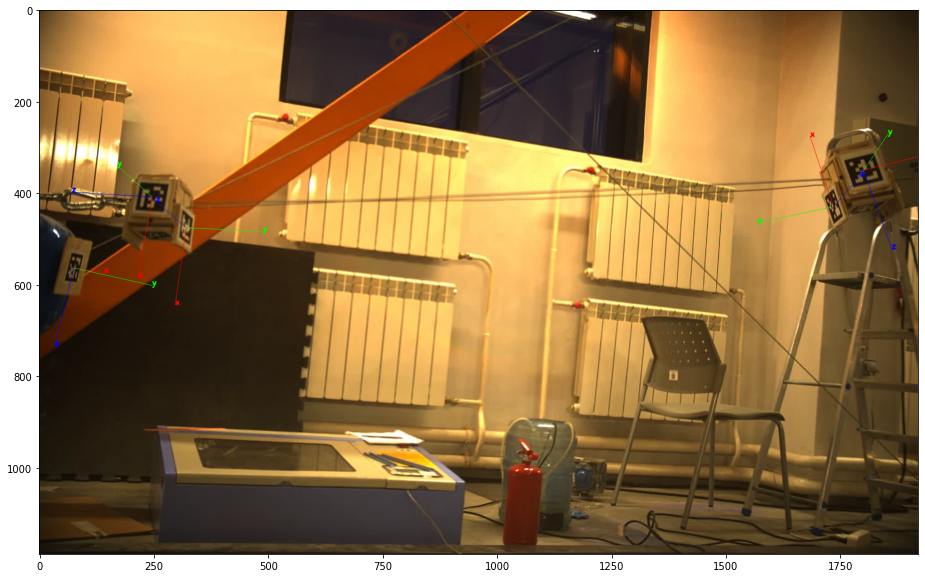

In [87]:
cap = cv2.VideoCapture("./Data/baumer_video0043.avi")
ret, frame = cap.read()

frame_copy = frame.copy()
detector = aruco.MarkerDetector()
markers = detector.detect(frame_copy)

print("detected ids: {}".format(", ".join(str(m.id) for m in markers)))

for marker in markers:
    # print marker ID and point positions
    print("Marker: {:d}".format(marker.id))
    for i, point in enumerate(marker):
        print("\t{:d} {}".format(i, str(point)))
#     marker.draw(frame_copy, np.array([255, 255, 255]), 2)

    # calculate marker extrinsics for marker size of 3.5cm
    marker.calculateExtrinsics(0.035, camparam)
#     print("Marker extrinsics:\n{}\n{}".format(marker.Tvec, marker.Rvec))
    aruco.CvDrawingUtils.draw3dAxis(frame_copy, camparam, marker.Rvec, marker.Tvec, .1)

plt.figure(figsize=(20,10))
plt.imshow(cv2.cvtColor(frame_copy, cv2.COLOR_BGR2RGB))
plt.show()

In [54]:
mmap_l_p.estimatePose(markers)
mmap_l_p.isValid()
mmap_l_p.getRvec(), mmap_l_p.getTvec()
mmap_h_p.estimatePose(markers)


True

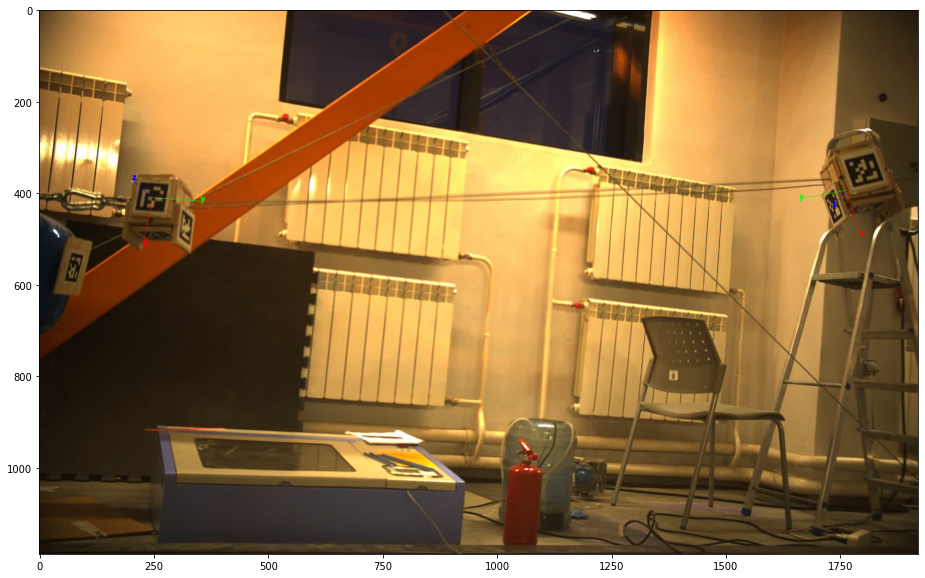

In [56]:
if (mmap_l_p.isValid()):
    aruco.CvDrawingUtils.draw3dAxis(frame_copy, camparam, mmap_l_p.getRvec(), mmap_l_p.getTvec(), .1)
if (mmap_h_p.isValid()):
    aruco.CvDrawingUtils.draw3dAxis(frame_copy, camparam, mmap_h_p.getRvec(), mmap_h_p.getTvec(), .1)


plt.figure(figsize=(20,10))
plt.imshow(cv2.cvtColor(frame_copy, cv2.COLOR_BGR2RGB))
plt.show()

In [57]:
camparam = aruco.CameraParameters()
camparam.readFromXMLFile("./arucoConfig/baumer12mm1mf.yml")

# create detector and get parameters
mmap_lowest = aruco.MarkerMap("./arucoConfig/block1(lowest).yml")
mmap_highest = aruco.MarkerMap("./arucoConfig/block2(highest).yml")

mmap_l_p = aruco.MarkerMapPoseTracker()
mmap_l_p.setParams(camparam, mmap_lowest)
mmap_h_p = aruco.MarkerMapPoseTracker()
mmap_h_p.setParams(camparam, mmap_highest)

detector = aruco.MarkerDetector()

# load video
cap = cv2.VideoCapture("./Data/baumer_video0043.avi")
ret, frame = cap.read()

low_r = []
low_t = []
high_r = []
high_t = []

while ret:
    markers = detector.detect(frame)
    mmap_l_p.estimatePose(markers)
    mmap_h_p.estimatePose(markers)
    if (mmap_l_p.isValid()):
        low_r.append(mmap_l_p.getRvec())
        low_t.append(mmap_l_p.getTvec())
    if (mmap_h_p.isValid()):
        high_r.append(mmap_h_p.getRvec())
        high_t.append(mmap_h_p.getTvec())
    
    # read next frame
    ret, frame = cap.read()

cap.release()

In [82]:
mmap_h_p.getRTMatrix()

array([[ 0.18703808, -0.981836  ,  0.03185668,  0.7324008 ],
       [ 0.9515452 ,  0.18913479,  0.242466  , -0.18662138],
       [-0.24408707, -0.01503732,  0.9696367 ,  2.0059474 ],
       [ 0.        ,  0.        ,  0.        ,  1.        ]],
      dtype=float32)

In [77]:
mean_r_l = np.expand_dims(np.hstack(low_r).mean(axis=1), 1)
mean_t_l = np.expand_dims(np.hstack(low_t).mean(axis=1), 1)

mean_r_h = np.expand_dims(np.hstack(high_r).mean(axis=1), 1)
mean_t_h = np.expand_dims(np.hstack(high_t).mean(axis=1), 1)

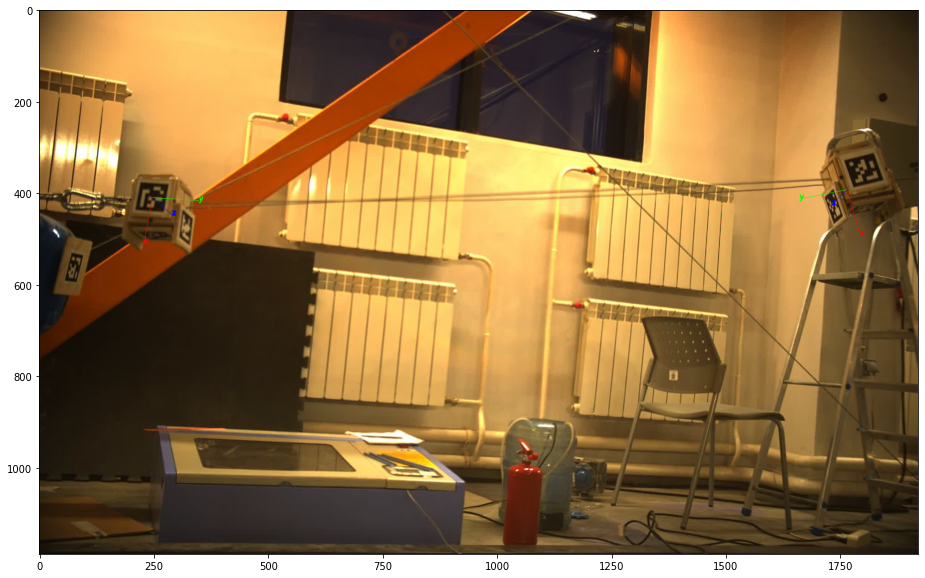

In [80]:
aruco.CvDrawingUtils.draw3dAxis(frame_copy, camparam, mean_r_l, mean_t_l, .1)
aruco.CvDrawingUtils.draw3dAxis(frame_copy, camparam, mean_r_h, mean_t_h, .1)


plt.figure(figsize=(20,10))
plt.imshow(cv2.cvtColor(frame_copy, cv2.COLOR_BGR2RGB))
plt.show()

detected ids: 7, 15, 24


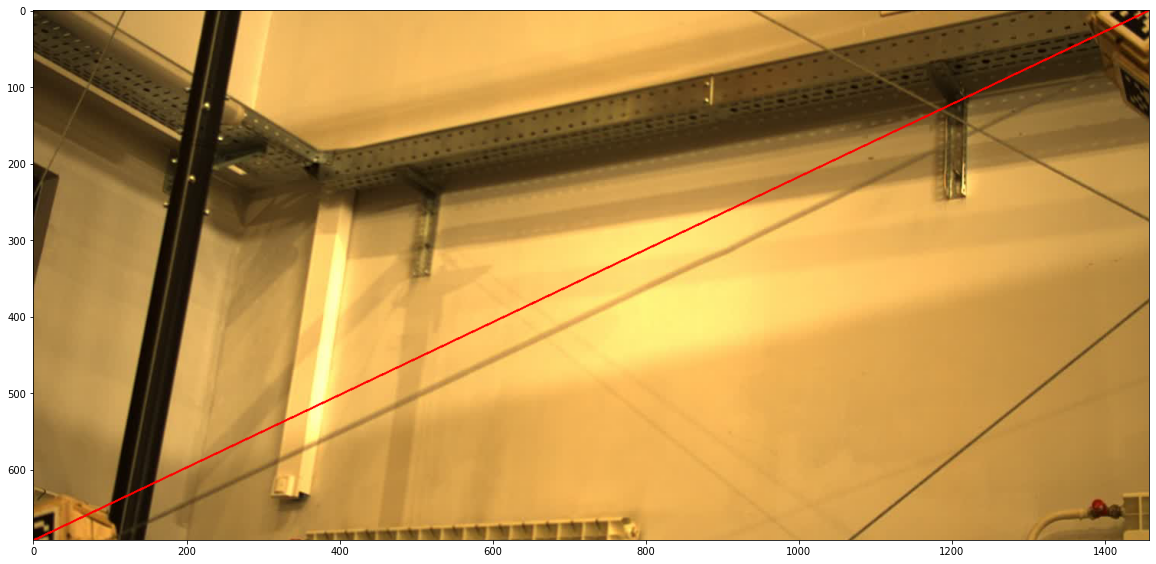

In [228]:
cap = cv2.VideoCapture("./Data/baumer_video0050.avi")
ret, frame = cap.read()

frame_copy = frame.copy()
detector = aruco.MarkerDetector()
markers = detector.detect(frame_copy)

print("detected ids: {}".format(", ".join(str(m.id) for m in markers)))

lower_marker = None
upper_marker = None
for marker in markers:
    # print marker ID and point positions
    if marker.id == 24:
        upper_marker = marker
    if marker.id == 7:
        lower_marker = marker
        
min_h, max_w = np.array(lower_marker).mean(axis=0)
max_h, min_w = np.array(upper_marker).mean(axis=0)
min_h, max_h, min_w, max_w = int(min_h), int(max_h), int(min_w), int(max_w)

cropped = frame_copy[min_w:max_w, min_h:max_h].copy()
frame_copy = frame_copy[min_w:max_w, min_h:max_h]

frame_copy = cv2.line(frame_copy,(0, max_w-min_w), (max_h-min_h, 0), [0,0,255], 2)

plt.figure(figsize=(20,10))
plt.imshow(cv2.cvtColor(frame_copy, cv2.COLOR_BGR2RGB))
plt.show()

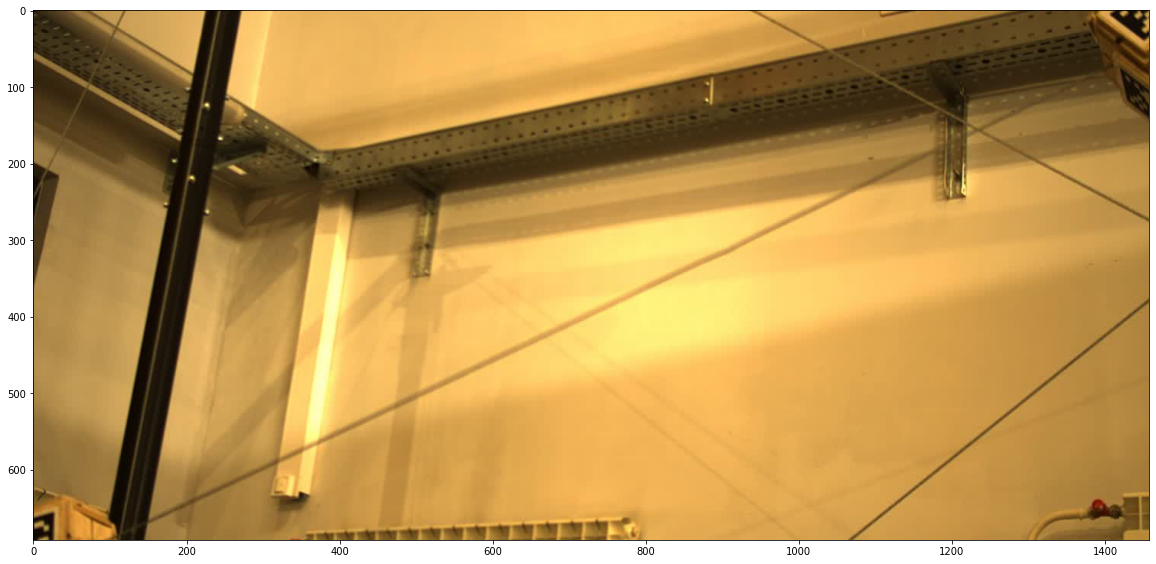

In [211]:
img_converted = cv2.cvtColor(cropped, cv2.COLOR_BGR2RGB)
plt.figure(figsize=(20,10))
plt.imshow(img_converted)
plt.show()

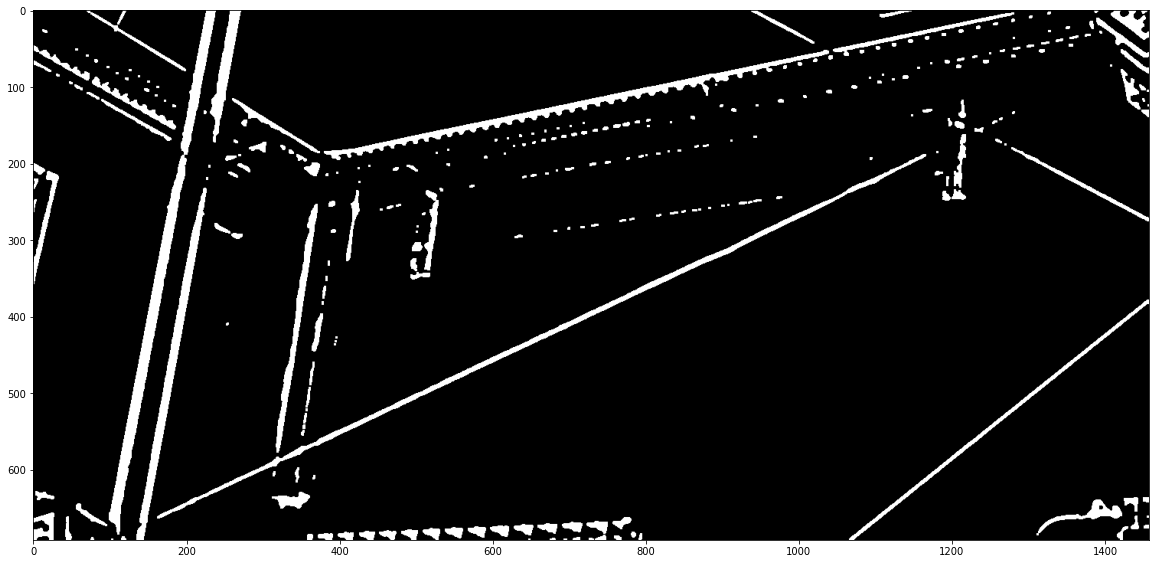

In [257]:
check_gray = cv2.cvtColor(cropped, cv2.COLOR_RGB2GRAY)
check_gray = cv2.GaussianBlur(check_gray, (7,7), 0)

check_gray = cv2.adaptiveThreshold(check_gray,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY_INV,51,12)

kernel_dilation = cv2.getStructuringElement(cv2.MORPH_RECT,(3,3))
kernel_erosion = cv2.getStructuringElement(cv2.MORPH_RECT,(3,3))

check_gray = cv2.erode(check_gray, kernel_erosion)
check_gray = cv2.dilate(check_gray, kernel_dilation)

plt.figure(figsize=(20,10))
plt.imshow(check_gray, cmap='gray')

plt.show()

In [ ]:
th = cv2.cvtColor(check_gray, cv2.COLOR_GRAY2RGB)
th = 
frame_copy = cv2.line(frame_copy,(0, max_w-min_w), (max_h-min_h, 0), [0,0,255], 2)
